In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig, eigh

np.set_printoptions(linewidth=np.inf)


#autor: Bryan Daniel Gomez Montes


In [2]:
def BH_ztU(psi0,t,mu,dimension,tolerancia):
    bdaga=np.zeros((dimension,dimension)) # operador de ascenso 
    b=np.zeros((dimension,dimension)) # operador de descenso 
    n=np.zeros((dimension,dimension)) # operador de número
    Iden=np.eye(dimension)        # identidad en funcion de la dimension propuesta
    
    #Aqui vamos a construir las matrices b, bdaga y n
    
    for i in range(dimension-1):   
        bdaga[i+1,i]=np.sqrt(i+1) # para el operador asenso
        b[i,i+1]=np.sqrt(i+1) # para el operador desenso
        n[i,i]=i           # operador de número
    n[dimension-1,dimension-1]=dimension -1      #este es para el ultimo valor del operador de numero que no es puesto al usar el for
    
    
    
    
   

    error=10                # comenzamos con un error muy grande inicial para que pueda entrar al ciclo while
    iteracion=0                     # iniciamos las iteraciones en 0

    #Esta parte es para obtener el estado base
    
    while error>tolerancia:     
                 
        Hamilton=-t*psi0*(bdaga+b)+t*(psi0**2)*Iden+0.5*np.matmul(n,(n-Iden))-mu*n # Este es el Hamiltoniano de zt/U
        
    
        #Aqui es para los valores del eigenvalor
        evals,vecs=eigh(Hamilton) #diagonalizamos
        vector_base=vecs[:,0] #este es para el estado base
        psi=np.matmul(np.transpose(vector_base),np.matmul(b,vector_base)) #obtenemos el eigenestado del estado base que es con el 0
        
        #aqui calculamos el error
        error=abs(psi0-psi)
        psi0=psi #actualizamos el valor de psi 
        iteracion+=1   #este nos va a servir para ver las cuanod ocurra cada ciclo while
 
    #Aqui estamos calculando las fluctuaciones 
    n_cuadrado_esperado=(np.matmul(np.transpose(vector_base),(np.matmul((np.matmul(n,n)),vector_base))))
    
    n_esperado_alcuadrado=(np.matmul(np.transpose(vector_base),(np.matmul((n),vector_base))))**2
    
    fluctuaciones=n_cuadrado_esperado-n_esperado_alcuadrado
    
    
    
    return iteracion, psi0,fluctuaciones

# Para dimension 6

In [3]:
#Aqui lo vamos a probar para un punto

psi0=1.0 #condicion inicial/anzats
t=1.      # zt/U  [0,1]  U/zt [0,10]
mu=1.     # m/U   [0,3]
dimension=6 #Dimension
tolerancia=0.0001

BH_ztU(psi0,t,mu,dimension,tolerancia)

(6, 1.422519621470034, 0.9015986234120055)

In [4]:
#Aqui lo vamos a probar para varios puntos y lo guardaremos en matrices.


#Estos son los parametros de que seran colocados en la funcion 
dimension=6 #Dimension
tolerancia=0.0001

N=350 #esta N es para verificar cuantos puntos vamos a colocar en las graficas a partir de 300 se ve bien

Datos_Psi=np.zeros((N,N))
Datos_PsiT=np.zeros((N,N))
Datos_iteracion=np.zeros((N,N))

Datos_f=np.zeros((N,N))

Datos_t=np.linspace(0,1,num=N)  # zt/U  [0,1]
Datos_mu=np.linspace(0,3,num=N) # m/U   [0,3]

for i in range(N):
    for j in range(N):
        Datos_iteracion[i,j],Datos_Psi[i,j],Datos_f[i,j]=BH_ztU(psi0,Datos_t[i],Datos_mu[j],dimension,tolerancia)


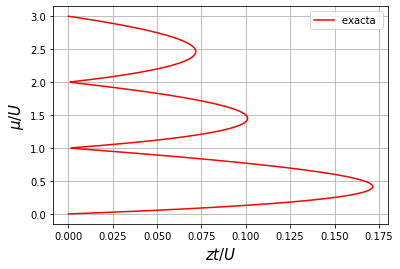

In [5]:
#Aqui implementamos la funcion analitica

g=np.trunc(Datos_mu+1)
x=Datos_mu

funcion= lambda Datos_mu: (-(g)**2 +2*x*g +g  -(x)**2 -x )/(1+x)



plt.plot(funcion(Datos_mu),Datos_mu,"r",label="exacta ")
plt.xlabel(r'$zt/U$',size=15)
plt.ylabel(r'$\mu/U$',size=15)
plt.grid()
plt.legend()
plt.show()


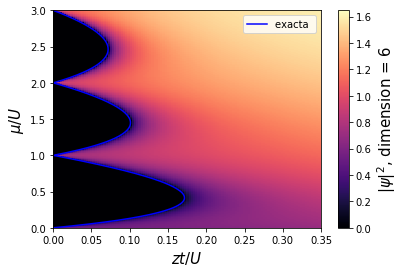

In [6]:
extension1=[Datos_t[0],Datos_t[N-1],Datos_mu[0],Datos_mu[N-1]]
Datos_PsiT=np.transpose(Datos_Psi)


plt.plot(funcion(Datos_mu),Datos_mu,"b",label="exacta ")#esta es para la funcion exacta
plt.imshow(Datos_PsiT,aspect='auto', extent=extension1, cmap='magma', origin='lower')
plt.xlabel(r'$zt/U$',size=15)
plt.ylabel(r'$\mu/U$',size=15)
plt.xlim([0, 0.35])
cbar=plt.colorbar()
cbar.set_label(r'$|\psi|^{2}$, dimension = 6',size=15)

plt.legend()
plt.show()

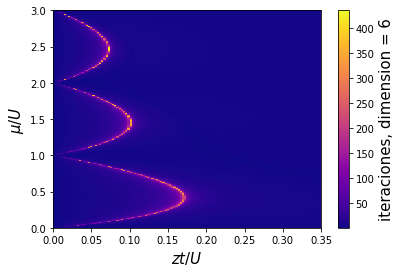

In [7]:
Datos_iteracionT=np.transpose(Datos_iteracion)


plt.imshow(Datos_iteracionT,aspect='auto',extent=extension1, cmap='plasma', origin='lower')
plt.xlabel(r'$zt/U$',size=15)
plt.ylabel(r'$\mu/U$',size=15)
plt.xlim([0, 0.35])
cbar=plt.colorbar()
cbar.set_label('iteraciones, dimension = 6',size=15)

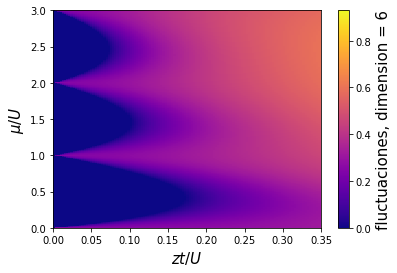

In [8]:

Datos_fT=np.transpose(Datos_f)

plt.imshow(Datos_fT,aspect='auto',extent=extension1, cmap='plasma', origin='lower')
plt.xlabel(r'$zt/U$',size=15)
plt.ylabel(r'$\mu/U$',size=15)
plt.xlim([0, 0.35])
cbar=plt.colorbar()
cbar.set_label('fluctuaciones, dimension = 6',size=15)

# Para dimension 55

In [9]:
#Aqui lo vamos a probar para un punto

psi0=1.0 #condicion inicial/anzats
t=1.      # zt/U  [0,1]  U/zt [0,10]
mu=1.     # m/U   [0,3]
dimension5=55 #Dimension
tolerancia=0.0001

BH_ztU(psi0,t,mu,dimension5,tolerancia)

(7, 1.4439127440481943, 0.9471096615390868)

In [10]:
#Aqui lo vamos a probar para varios puntos y lo guardaremos en matrices.


#Estos son los parametros de que seran colocados en la funcion 
dimension5=55 #Dimension
tolerancia=0.0001

N=250 #esta N es para verificar cuantos puntos vamos a colocar en las graficas a partir de 300 se ve bien

Datos_Psi5=np.zeros((N,N))
Datos_PsiT5=np.zeros((N,N))
Datos_iteracion5=np.zeros((N,N))

Datos_f5=np.zeros((N,N))

Datos_t5=np.linspace(0,1,num=N)  # zt/U  [0,1]
Datos_mu5=np.linspace(0,3,num=N) # m/U   [0,3]

for i in range(N):
    for j in range(N):
        Datos_iteracion5[i,j],Datos_Psi5[i,j],Datos_f5[i,j]=BH_ztU(psi0,Datos_t5[i],Datos_mu5[j],dimension5,tolerancia)


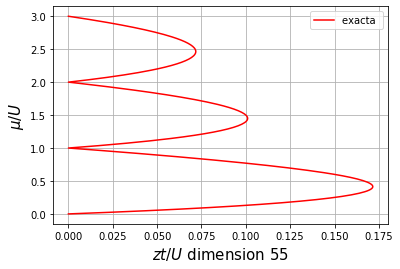

In [11]:
#Aqui implementamos la funcion analitica

g=np.trunc(Datos_mu5+1)
x=Datos_mu5

funcion= lambda Datos_mu5: (-(g)**2 +2*x*g +g  -(x)**2 -x )/(1+x)



plt.plot(funcion(Datos_mu5),Datos_mu5,"r",label="exacta ")
plt.xlabel(r'$zt/U$ dimension 55',size=15)
plt.ylabel(r'$\mu/U$',size=15)
plt.grid()
plt.legend()
plt.show()


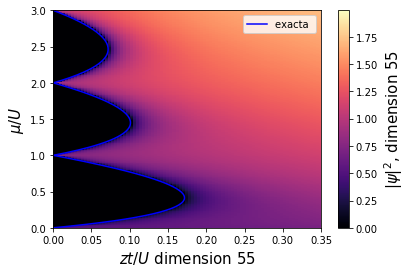

In [12]:
extension5=[Datos_t5[0],Datos_t5[N-1],Datos_mu5[0],Datos_mu5[N-1]]
Datos_PsiT5=np.transpose(Datos_Psi5)


plt.plot(funcion(Datos_mu5),Datos_mu5,"b",label="exacta ")#esta es para la funcion exacta
plt.imshow(Datos_PsiT5,aspect='auto', extent=extension5, cmap='magma', origin='lower')
plt.xlabel(r'$zt/U$ dimension 55',size=15)
plt.ylabel(r'$\mu/U$',size=15)
plt.xlim([0, 0.35])
cbar=plt.colorbar()
cbar.set_label(r'$|\psi|^{2}$, dimension 55',size=15)

plt.legend()
plt.show()

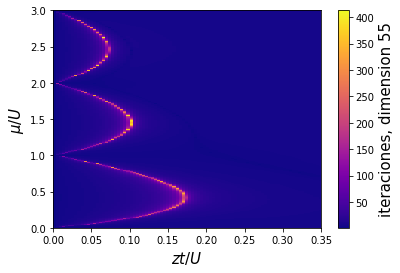

In [13]:
Datos_iteracionT5=np.transpose(Datos_iteracion5)


plt.imshow(Datos_iteracionT5,aspect='auto',extent=extension5, cmap='plasma', origin='lower')
plt.xlabel(r'$zt/U$ ',size=15)
plt.ylabel(r'$\mu/U$',size=15)
plt.xlim([0, 0.35])
cbar=plt.colorbar()
cbar.set_label('iteraciones, dimension 55',size=15)

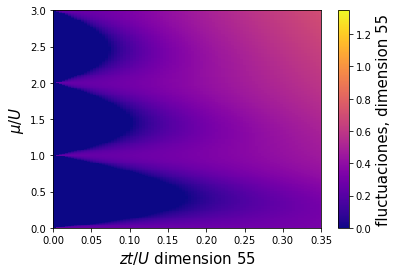

In [14]:

Datos_fT5=np.transpose(Datos_f5)

plt.imshow(Datos_fT5,aspect='auto',extent=extension5, cmap='plasma', origin='lower')
plt.xlabel(r'$zt/U$ dimension 55',size=15)
plt.ylabel(r'$\mu/U$',size=15)
plt.xlim([0, 0.35])
cbar=plt.colorbar()
cbar.set_label('fluctuaciones, dimension 55',size=15)


# Para dimension 55

In [15]:
def BH_psi2(psi0,u,mu,dimension,tolerancia):
    
    
    bdaga=np.zeros((dimension,dimension)) # operador de ascenso 
    b=np.zeros((dimension,dimension)) # operador de descenso 
    n=np.zeros((dimension,dimension)) # operador de número
    Iden=np.eye(dimension)        # identidad en funcion de la dimension propuesta
    
    #Aqui vamos a construir las matrices b, bdaga y n
    
    for i in range(dimension-1):   
        bdaga[i+1,i]=np.sqrt(i+1) # para el operador asenso
        b[i,i+1]=np.sqrt(i+1) # para el operador desenso
        n[i,i]=i           # operador de número
    n[dimension-1,dimension-1]=dimension-1       #este es para el ultimo valor del operador de numero que no es puesto al usar el for
    
    #print(bdaga)
    
    
   

    error=10                # comenzamos con un error muy grande inicial para que pueda entrar al ciclo while
    iteracion=0                     # iniciamos las iteraciones en 0

    #Esta parte es para obtener el estado base
    
    while error>tolerancia:     
                 
        
        Hamilton=-psi0*(bdaga+b)+(psi0**2)*Iden+ 0.5*u*np.matmul(n,(n-Iden))-mu*n # Hamiltoniano de U/zt
        
    
        #Aqui es para los valores del eigenvalor
        evals,vecs=eigh(Hamilton) #diagonalizamos
        vector_base=vecs[:,0] #este es para el estado base
        psi=np.matmul(np.transpose(vector_base),np.matmul(b,vector_base)) #obtenemos el eigenestado del estado base que es con el 0
        
        #aqui calculamos el error
        error=abs(psi0-psi)
        psi0=psi #actualizamos el valor de psi 
        iteracion+=1   #este nos va a servir para ver las cuanod ocurra cada ciclo while
 
    #Aqui estamos calculando las fluctuaciones 
    n_cuadrado_esperado=(np.matmul(np.transpose(vector_base),(np.matmul((np.matmul(n,n)),vector_base))))
    
    n_esperado_alcuadrado=(np.matmul(np.transpose(vector_base),(np.matmul((n),vector_base))))**2
    
    fluctuaciones=n_cuadrado_esperado-n_esperado_alcuadrado
    
    
    
    return iteracion, psi0,fluctuaciones







In [16]:
psi0=1.0 #condicion inicial
u=1.      #  U/zt [0,10]
mu=1.     # m/U   [0,3]

dimension2=55 #Dimension
tolerancia2=0.0001

BH_psi2(psi0,u,mu,dimension2,tolerancia2)

(7, 1.4439127440481943, 0.9471096615390868)

In [ ]:
#Implementamos el caso de U/zt

N=250

Datos_Psi2=np.zeros((N,N))
#Data_PsiT2=np.zeros((N,N))
Datos_iteracion2=np.zeros((N,N))


Datos_f2=np.zeros((N,N))

Datos_u=np.linspace(0,20,num=N)
Datos_mu2=np.linspace(0,60,num=N)

for i in range(N):
    for j in range(N):
        Datos_iteracion2[i,j],Datos_Psi2[i,j],Datos_f2[i,j]   =   BH_psi2(psi0,Datos_u[i],Datos_mu2[j],dimension2,tolerancia2)

In [ ]:
#implemntamos la funcion analitica

exacta1= lambda u,ge:0.5*(u*(2*ge-1)-1)+0.5*np.sqrt(u**2-(2*u*(2*ge+1))+1)
exacta2= lambda u,ge:0.5*(u*(2*ge-1)-1)-0.5*np.sqrt(u**2-(2*u*(2*ge+1))+1)

#critica= lambda u,ge:2*ge+1+np.sqrt((2*g+1)**2-1)


#plt.plot(Datos_u,critica(Datos_u,1),"r")


plt.plot(Datos_u,exacta1(Datos_u,1),"b",label="exacta ")
plt.plot(Datos_u,exacta2(Datos_u,1),"b")

plt.plot(Datos_u,exacta1(Datos_u,2),"b")
plt.plot(Datos_u,exacta2(Datos_u,2),"b")

plt.plot(Datos_u,exacta1(Datos_u,3),"b")
plt.plot(Datos_u,exacta2(Datos_u,3),"b")

#plt.plot(Datos_u,exacta1(Datos_u,4),"b")
#plt.plot(Datos_u,exacta2(Datos_u,4),"b")

plt.ylabel(r'$\mu/zt$',size=15)
plt.xlabel(r'$U/zt$',size=15)

plt.grid()
plt.legend()
plt.show()


In [ ]:
extension3=[Datos_u[0],Datos_u[N-1],Datos_mu2[0],Datos_mu2[N-1]]
Datos_PsiT2=np.transpose(Datos_Psi2)

plt.imshow(Datos_PsiT2,aspect='auto',extent=extension3, cmap='inferno', origin='lower') #esta es la numerica


plt.plot(Datos_u,exacta1(Datos_u,1),"b",label="exacta ")
plt.plot(Datos_u,exacta2(Datos_u,1),"b")

plt.plot(Datos_u,exacta1(Datos_u,2),"b")
plt.plot(Datos_u,exacta2(Datos_u,2),"b")

plt.plot(Datos_u,exacta1(Datos_u,3),"b")
plt.plot(Datos_u,exacta2(Datos_u,3),"b")


#plt.plot(Datos_u,exacta1(Datos_u,4),"b")
#plt.plot(Datos_u,exacta2(Datos_u,4),"b")



plt.ylabel(r'$\mu/zt$',size=15)
plt.xlabel(r'$U/zt$',size=15)

cbar=plt.colorbar()
cbar.set_label(r'$|\psi|^{2}$ dimension=55',size=15)

plt.legend()
plt.show()

In [ ]:

Datos_iteracion2T=np.transpose(Datos_iteracion2)

plt.imshow(Datos_iteracion2T,aspect='auto',extent=extension3, cmap='plasma', origin='lower')

plt.ylabel(r'$\mu/zt$',size=15)
plt.xlabel(r'$U/zt$',size=15)

cbar=plt.colorbar()
cbar.set_label('iteraciones, dimension=55',size=15)

In [ ]:
Datos_f2T=np.transpose(Datos_f2)


#plt.plot(Datos_u,exacta1(Datos_u,1),"r",label="exacta ")
#plt.plot(Datos_u,exacta2(Datos_u,1),"r")

#plt.plot(Datos_u,exacta1(Datos_u,2),"r")
#plt.plot(Datos_u,exacta2(Datos_u,2),"r")

#plt.plot(Datos_u,exacta1(Datos_u,3),"r")
#plt.plot(Datos_u,exacta2(Datos_u,3),"r")



plt.imshow(Datos_f2T,aspect='auto',extent=extension3, cmap='cividis', origin='lower')

plt.ylabel(r'$\mu/zt$',size=15)
plt.xlabel(r'$U/zt$',size=15)

cbar=plt.colorbar()
cbar.set_label('fluctuaciones, dimension = 55',size=15)

plt.legend()
plt.show()

# Para la dimension 6

In [ ]:
psi0=1.0 #condicion inicial
u=1.      #  U/zt [0,10]
mu=1.     # m/U   [0,3]

dimension3=6 #Dimension
tolerancia3=0.0001

BH_psi2(psi0,u,mu,dimension3,tolerancia2)

In [ ]:
N=250

Datos_Psi3=np.zeros((N,N))
#Data_PsiT2=np.zeros((N,N))
Datos_iteracion3=np.zeros((N,N))


Datos_f3=np.zeros((N,N))

Datos_u3=np.linspace(0,20,num=N)
Datos_mu3=np.linspace(0,60,num=N)

for i in range(N):
    for j in range(N):
        Datos_iteracion3[i,j],Datos_Psi3[i,j],Datos_f3[i,j]   =   BH_psi2(psi0,Datos_u3[i],Datos_mu3[j],dimension3,tolerancia3)

In [ ]:
extension4=[Datos_u3[0],Datos_u3[N-1],Datos_mu3[0],Datos_mu3[N-1]]
Datos_PsiT3=np.transpose(Datos_Psi3)

plt.imshow(Datos_PsiT3,aspect='auto',extent=extension4, cmap='inferno', origin='lower') #esta es la numerica


plt.plot(Datos_u3,exacta1(Datos_u3,1),"b",label="exacta ")
plt.plot(Datos_u3,exacta2(Datos_u3,1),"b")

plt.plot(Datos_u3,exacta1(Datos_u3,2),"b")
plt.plot(Datos_u3,exacta2(Datos_u3,2),"b")

plt.plot(Datos_u3,exacta1(Datos_u3,3),"b")
plt.plot(Datos_u3,exacta2(Datos_u3,3),"b")


#plt.plot(Datos_u,exacta1(Datos_u,4),"b")
#plt.plot(Datos_u,exacta2(Datos_u,4),"b")



plt.ylabel(r'$\mu/zt$',size=15)
plt.xlabel(r'$U/zt$',size=15)

cbar=plt.colorbar()
cbar.set_label(r'$|\psi|^{2}$ dimension=6',size=15)

plt.legend()
plt.show()

In [ ]:
Datos_iteracion3T=np.transpose(Datos_iteracion3)

plt.imshow(Datos_iteracion3T,aspect='auto',extent=extension4, cmap='plasma', origin='lower')

plt.ylabel(r'$\mu/zt$',size=15)
plt.xlabel(r'$U/zt$',size=15)

cbar=plt.colorbar()
cbar.set_label('iteraciones, dimension=6',size=15)

In [ ]:
Datos_f3T=np.transpose(Datos_f3)


#plt.plot(Datos_u,exacta1(Datos_u,1),"r",label="exacta ")
#plt.plot(Datos_u,exacta2(Datos_u,1),"r")

#plt.plot(Datos_u,exacta1(Datos_u,2),"r")
#plt.plot(Datos_u,exacta2(Datos_u,2),"r")

#plt.plot(Datos_u,exacta1(Datos_u,3),"r")
#plt.plot(Datos_u,exacta2(Datos_u,3),"r")



plt.imshow(Datos_f3T,aspect='auto',extent=extension4, cmap='plasma', origin='lower')

plt.ylabel(r'$\mu/zt$',size=15)
plt.xlabel(r'$U/zt$',size=15)

cbar=plt.colorbar()
cbar.set_label('fluctuaciones, dimension = 6',size=15)

